# Required Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Loading Dataset

In [2]:
(x_train, y_train), (X_test, y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 12s 1us/step


In [4]:
len(x_train),len(X_test)

(60000, 10000)

In [6]:
x_train[0].shape

(28, 28)

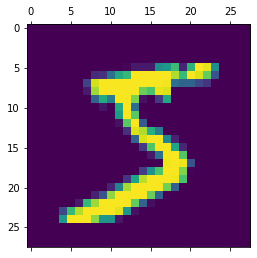

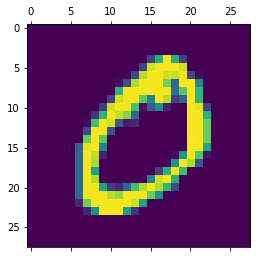

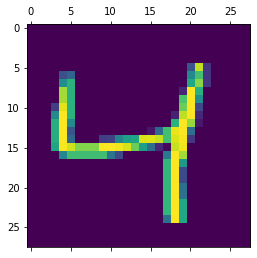

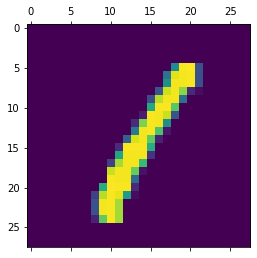

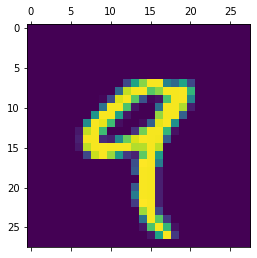

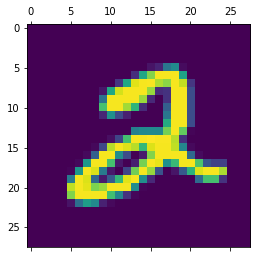

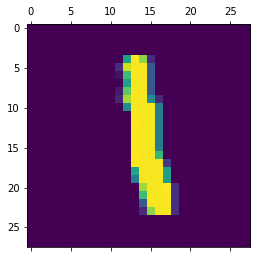

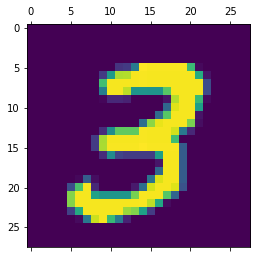

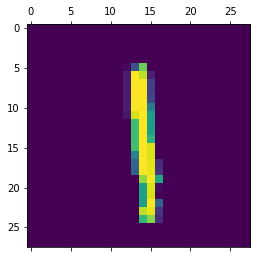

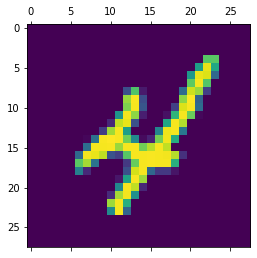

In [11]:
for i in range(10):
    plt.matshow(x_train[i]) 

In [12]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [14]:
flattend_xtrain=x_train.reshape(len(x_train),28*28)
flattend_xtest=X_test.reshape(len(X_test),28*28)

 # Scaling Dataset

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(flattend_xtrain)
scaled_xtrain=scaler.transform(flattend_xtrain)
scaled_xtest=scaler.transform(flattend_xtest)

In [109]:
scaled_xtrain[0].shape, scaled_xtest[0].shape

((784,), (784,))

# Model Creation

In [96]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")

])
model.compile(
    optimizer="adam",
    loss="SparseCategoricalCrossentropy",
    metrics=["accuracy"]
)

history=model.fit(scaled_xtrain,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2745 - accuracy: 0.9227
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1252 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0873 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0658 - accuracy: 0.9802
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0532 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0425 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0358 - accuracy: 0.9891
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0295 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0240 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.

In [29]:
model.evaluate(scaled_xtest,y_test)

313/313 [==============================] - 6s 5ms/step - loss: 0.0797 - accuracy: 0.9780


[0.07968452572822571, 0.9779999852180481]

# Loss and Accuracy

dict_keys(['loss', 'accuracy'])


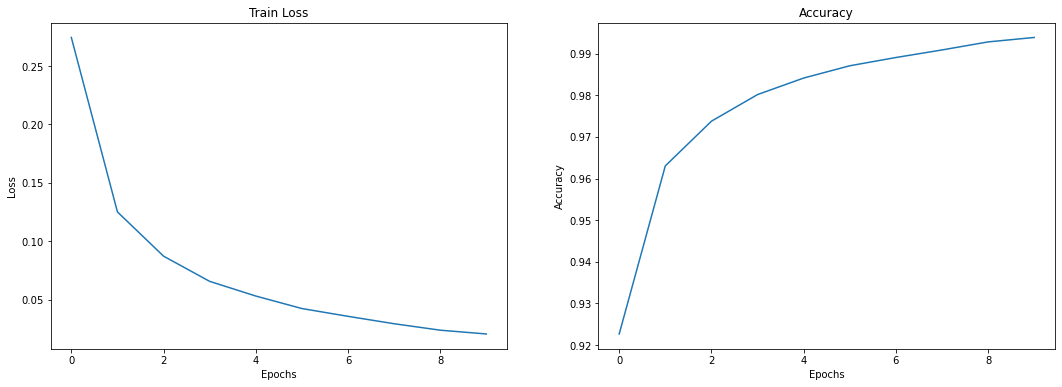

In [106]:
print(history.history.keys())
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.title("Train Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.plot(history.history["loss"])

plt.subplot(1,2,2)
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.plot(history.history["accuracy"])


In [110]:
temp=scaled_xtest[0].reshape(1,-1)
temp.shape,scaled_xtest.shape

((1, 784), (10000, 784))

In [54]:

prediction=model.predict(scaled_xtest)


313/313 [==============================] - 1s 3ms/step


In [55]:
prediction[1]

array([7.5906562e-04, 9.9697506e-01, 1.0000000e+00, 8.2335311e-01,
       5.8585380e-12, 1.9108501e-01, 2.8624853e-02, 2.8890812e-10,
       2.3246411e-02, 1.3559497e-12], dtype=float32)

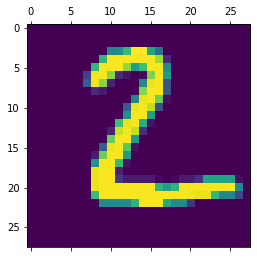

In [56]:
plt.matshow(X_test[1])

In [111]:
y_test[1] , np.argmax(prediction[1])

(2, 2)

# Testing model

In [70]:
prediction_labels=[np.argmax(i) for i in prediction] 

prediction_labels[:10]== y_test[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## Confusion Matix 

In [73]:
conf_matrix= tf.math.confusion_matrix(labels=y_test,predictions=prediction_labels)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    0,    2,    0,    5,    1,    2,    1],
       [   0, 1122,    3,    2,    0,    2,    2,    0,    4,    0],
       [   2,    1, 1006,    3,    4,    0,    2,    9,    5,    0],
       [   1,    0,    1,  989,    0,   10,    0,    4,    1,    4],
       [   1,    0,    2,    1,  959,    0,    4,    4,    1,   10],
       [   3,    1,    0,    7,    1,  866,    3,    2,    5,    4],
       [   4,    3,    1,    1,    6,    1,  942,    0,    0,    0],
       [   1,    1,    9,    3,    2,    0,    0, 1004,    1,    7],
       [   4,    0,    3,    5,   10,    4,    2,    5,  934,    7],
       [   1,    2,    0,    3,    6,    1,    0,    6,    0,  990]])>

In [82]:
x_ticks=np.sum(conf_matrix,axis=0)
x_ticks

array([ 985, 1130, 1026, 1014,  990,  884,  960, 1035,  953, 1023])

Text(123.0, 0.5, 'Actual Data')

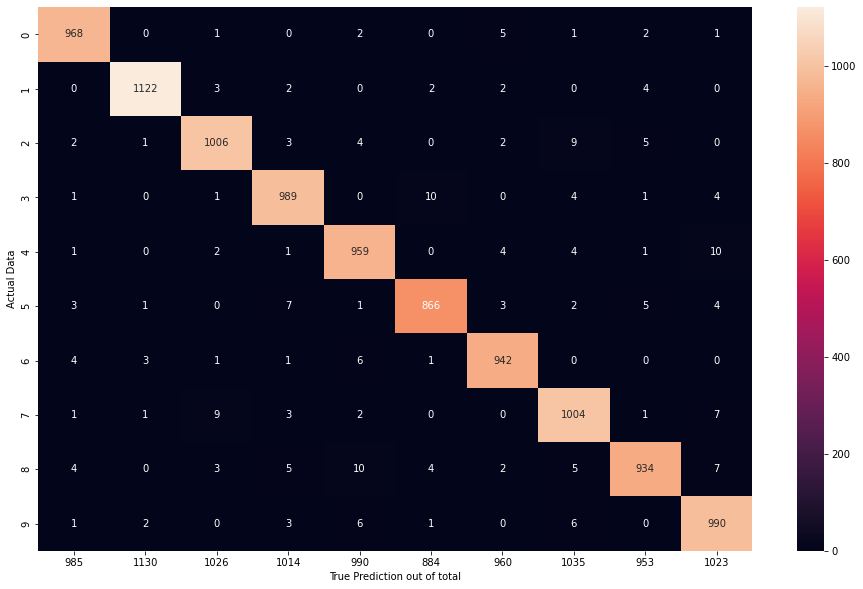

In [83]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.heatmap(conf_matrix,annot=True,fmt="d",xticklabels=x_ticks)
plt.xlabel("True Prediction out of total")
plt.ylabel("Actual Data")

In [90]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets
